### Pipeline demo notebook

#### Split Mnist task

In [1]:
import sys
sys.path.append("..")
from frcl.experiments.pipeline import BaselineTrainDemo, FRCLTrainDemo
from frcl.tasks import SplitMnistTask, PermutedMnistTask
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
task = SplitMnistTask()
frcl_pipeline = FRCLTrainDemo(task, n_repeat=1, device='cpu', n_epochs=4, lr=1e-5, batch_size=100, n_inducing=10, n_classes=2)
baseline_pipeline = BaselineTrainDemo(task, n_repeat=1, device='cpu', n_epochs=4, lr=1e-5, batch_size=100, n_inducing=10, n_classes=2)

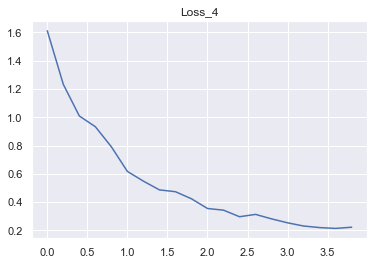

In [ ]:
frcl_res = frcl_pipeline.run()

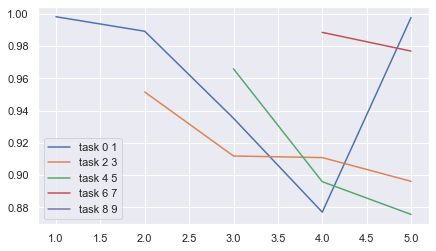

In [ ]:
tasks = [(0, 1), (2, 3), (4 ,5), (6, 7), (8, 9)]

fig = plt.figure(figsize=(7, 4))
for i, lbls in enumerate(tasks):
    lbl0, lbl1 = lbls
    x, y = frcl_res[0][0].get_task_estimations(i)
    plt.plot(x, y, label = "task {} {}".format(lbl0, lbl1))
    plt.legend()
plt.show()

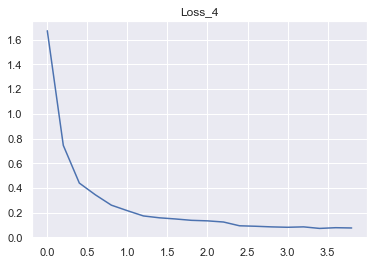

In [ ]:
baseline_res = baseline_pipeline.run()

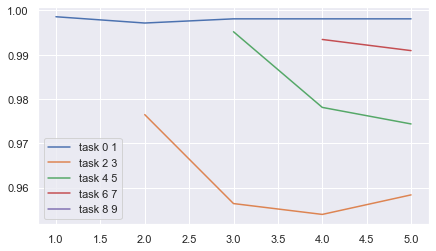

In [ ]:
tasks = [(0, 1), (2, 3), (4 ,5), (6, 7), (8, 9)]

fig = plt.figure(figsize=(7, 4))
for i, lbls in enumerate(tasks):
    lbl0, lbl1 = lbls
    x, y = baseline_res[0][0].get_task_estimations(i)
    plt.plot(x, y, label = "task {} {}".format(lbl0, lbl1))
    plt.legend()
plt.show()

#### Permuted Mnist task

In [3]:
n_tasks = 10
task = PermutedMnistTask(n_tasks)
baseline_pipeline = BaselineTrainDemo(task, n_repeat=1, device='cuda', n_epochs=10, lr=1e-5, batch_size=100, n_inducing=10, n_classes=10)

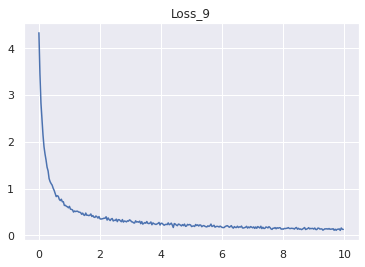

/content/frcl/frcl.py:106: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  distr = self.pred_func(torch.matmul(self.base(x), omega.T).squeeze())


In [9]:
baseline_res = baseline_pipeline.run()

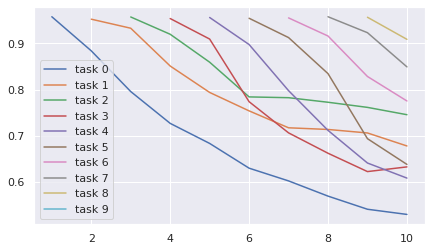

In [11]:
fig = plt.figure(figsize=(7, 4))
for i in range(n_tasks):
    x, y = baseline_res[0][0].get_task_estimations(i)
    plt.plot(x, y, label = "task {}".format(i))
    plt.legend()
plt.show()

In [9]:
n_tasks = 3
task = PermutedMnistTask(n_tasks)
frcl_pipeline = FRCLTrainDemo(task, n_repeat=1, device='cuda', n_epochs=10, lr=1e-4, batch_size=100, n_inducing=10, n_classes=10)

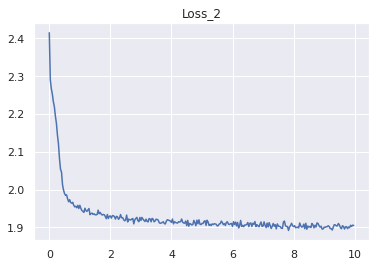

/content/frcl/frcl.py:304: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predicted += self.pred_func(torch.stack(sample, axis=1))


In [10]:
frcl_res = frcl_pipeline.run()

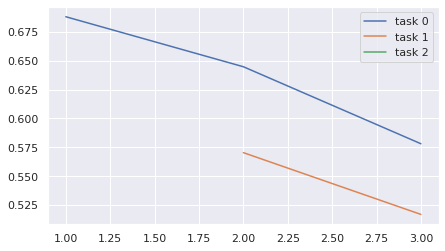

In [11]:
fig = plt.figure(figsize=(7, 4))
for i in range(n_tasks):
    x, y = frcl_res[0][0].get_task_estimations(i)
    plt.plot(x, y, label = "task {}".format(i))
    plt.legend()
plt.show()

#### Trace statistics on FRCL

In [3]:
from frcl.experiments.pipeline import FRCLStatTrace
task = SplitMnistTask()
frcl_pipeline =  FRCLStatTrace(task, n_repeat=1, device='cpu', n_epochs=4, lr=1e-5, batch_size=32, n_inducing=10, n_classes=2, int_compute_method='SVI', N_samples=20)

N tasks: 5, Epoch 3


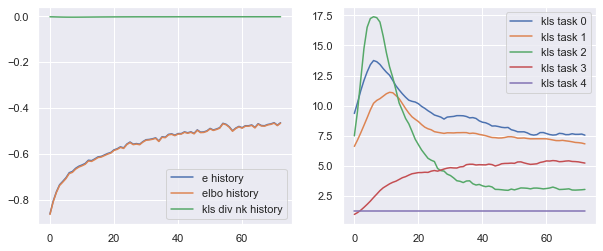

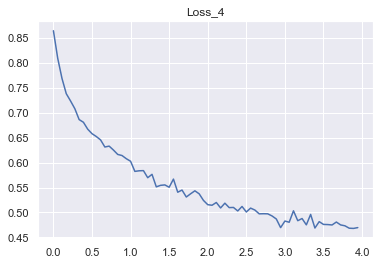

[[<frcl.experiments.estimators.AccuracyTasksEstimator at 0x83173cf948>]]

In [4]:
frcl_pipeline.run()